<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.593265,45.244928,96.316761,-0.011900,247.143054,247.153474,-0.010420
1,0.0,1.0,32.378765,53.489423,40.323056,0.003470,136.194714,136.187435,0.007279
2,0.0,2.0,43.717644,74.833501,76.843097,-0.004642,205.389601,205.392408,-0.002807
3,0.0,3.0,20.574486,57.417283,26.221629,-0.000097,114.213301,114.209429,0.003872
4,0.0,4.0,88.202306,80.844342,90.767707,-0.001373,269.812982,269.815647,-0.002665
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.128313,45.650077,43.132187,-0.016625,129.893953,129.906459,-0.012507
119996,999.0,116.0,39.528339,34.978275,46.669822,0.001668,131.178104,131.171726,0.006378
119997,999.0,117.0,28.271922,65.933781,77.418904,-0.009972,181.614635,181.621730,-0.007095
119998,999.0,118.0,99.025571,70.904011,82.554482,-0.005534,262.478530,262.484847,-0.006317


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.593265  45.244928  96.316761  ...  247.143054  247.153474 -0.010420
      1.0    32.378765  53.489423  40.323056  ...  136.194714  136.187435  0.007279
      2.0    43.717644  74.833501  76.843097  ...  205.389601  205.392408 -0.002807
      3.0    20.574486  57.417283  26.221629  ...  114.213301  114.209429  0.003872
      4.0    88.202306  80.844342  90.767707  ...  269.812982  269.815647 -0.002665
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  31.128313  45.650077  43.132187  ...  129.893953  129.906459 -0.012507
      116.0  39.528339  34.978275  46.669822  ...  131.178104  131.171726  0.006378
      117.0  28.271922  65.933781  77.418904  ...  181.614635  181.621730 -0.007095
      118.0  99.025571  70.904011  82.554482  ...  262.478530  262.484847 -0.006317
      119.0  72.355097  50.574033  76.386435  ...  209.333945  209.313394  0.020550

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.593265  45.244928  96.316761  ...  247.143054  247.153474 -0.010420
      1.0    32.378765  53.489423  40.323056  ...  136.194714  136.187435  0.007279
      2.0    43.717644  74.833501  76.843097  ...  205.389601  205.392408 -0.002807
      3.0    20.574486  57.417283  26.221629  ...  114.213301  114.209429  0.003872
      4.0    88.202306  80.844342  90.767707  ...  269.812982  269.815647 -0.002665
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  31.128313  45.650077  43.132187  ...  129.893953  129.906459 -0.012507
      116.0  39.528339  34.978275  46.669822  ...  131.178104  131.171726  0.006378
      117.0  28.271922  65.933781  77.418904  ...  181.614635  181.621730 -0.007095
      118.0  99.025571  70.904011  82.554482  ...  262.478530  262.484847 -0.006317
      119.0  72.355097  50.574033  76.386435  ...  209.333945  209.313394  0.020550

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.593265,45.244928,96.316761,-0.011900,247.143054,247.153474,-0.010420
1,0.0,1.0,32.378765,53.489423,40.323056,0.003470,136.194714,136.187435,0.007279
2,0.0,2.0,43.717644,74.833501,76.843097,-0.004642,205.389601,205.392408,-0.002807
3,0.0,3.0,20.574486,57.417283,26.221629,-0.000097,114.213301,114.209429,0.003872
4,0.0,4.0,88.202306,80.844342,90.767707,-0.001373,269.812982,269.815647,-0.002665
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.128313,45.650077,43.132187,-0.016625,129.893953,129.906459,-0.012507
119996,999.0,116.0,39.528339,34.978275,46.669822,0.001668,131.178104,131.171726,0.006378
119997,999.0,117.0,28.271922,65.933781,77.418904,-0.009972,181.614635,181.621730,-0.007095
119998,999.0,118.0,99.025571,70.904011,82.554482,-0.005534,262.478530,262.484847,-0.006317


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.593265  45.244928  96.316761  ...  247.143054  247.153474 -0.010420
      1.0    32.378765  53.489423  40.323056  ...  136.194714  136.187435  0.007279
      2.0    43.717644  74.833501  76.843097  ...  205.389601  205.392408 -0.002807
      3.0    20.574486  57.417283  26.221629  ...  114.213301  114.209429  0.003872
      4.0    88.202306  80.844342  90.767707  ...  269.812982  269.815647 -0.002665
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  31.128313  45.650077  43.132187  ...  129.893953  129.906459 -0.012507
      116.0  39.528339  34.978275  46.669822  ...  131.178104  131.171726  0.006378
      117.0  28.271922  65.933781  77.418904  ...  181.614635  181.621730 -0.007095
      118.0  99.025571  70.904011  82.554482  ...  262.478530  262.484847 -0.006317
      119.0  72.355097  50.574033  76.386435  ...  209.333945  209.313394  0.020550

[120000 rows x 7 columns]

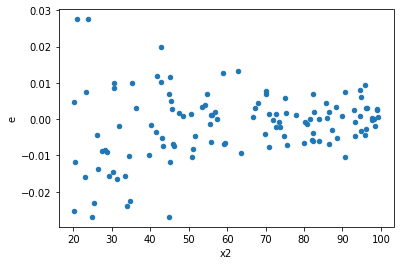

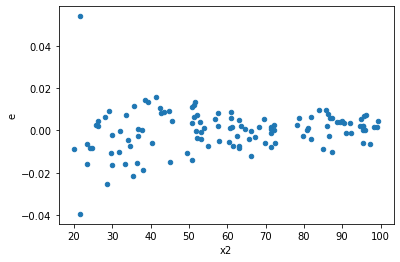

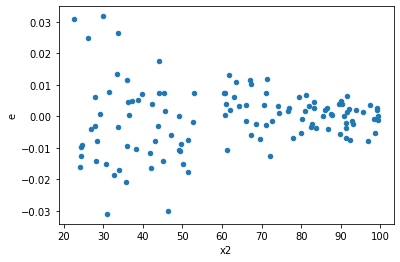

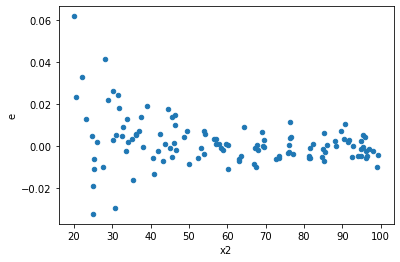

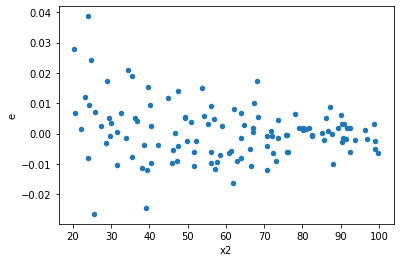

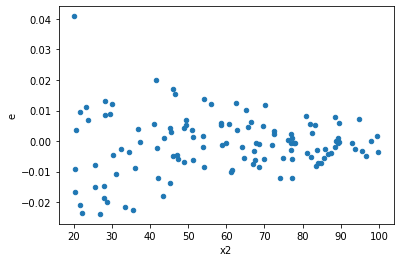

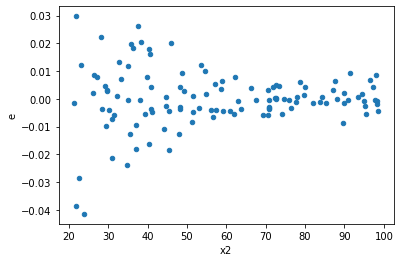

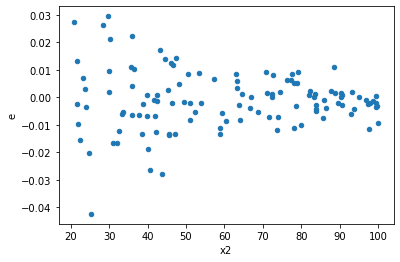

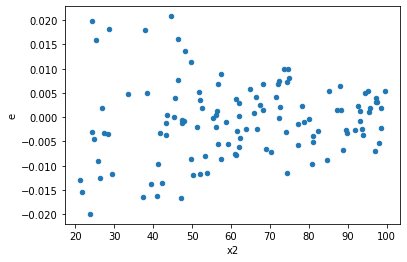

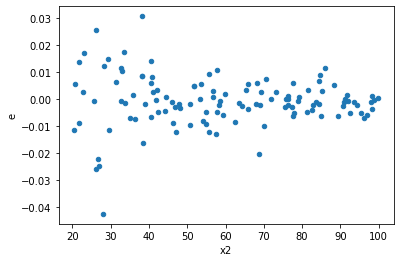

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,48.0,66.0,0.0036228315212345086,0.007590284219858685,7.708152172839381e-05,0.00011677360338244132,1.523727138012401,0.1269179094652424,0.9365410452673788,Reject001=1 : Homoscedasticity
2.0,64.0,50.0,0.004004509371924224,0.007578420304494271,6.356364082419403e-05,0.00015466163886723,2.422363662765383,0.0009081745112007322,0.9995459127443996,Reject001=0 : Heteroscedasticity
3.0,57.0,57.0,0.0014042104055440043,0.012461798652873292,2.507518581328579e-05,0.00022253211880130877,8.874595006327041,4.063416270128073e-14,0.9999999999999797,Reject001=0 : Heteroscedasticity
5.0,56.0,58.0,0.003332928479922932,0.007260640200060686,6.0598699634962396e-05,0.00012737965263264362,2.103337451985294,0.005858266137340307,0.9970708669313298,Reject001=0 : Heteroscedasticity
7.0,57.0,57.0,0.0017013909707652107,0.011511587454885097,3.0381981620807333e-05,0.00020556406169437672,6.765985980111139,1.6887158338363406e-11,0.9999999999915564,Reject001=0 : Heteroscedasticity
8.0,56.0,58.0,0.0024295672241194206,0.003955892546902725,4.417394952944401e-05,6.940162362987237e-05,1.5720834645614048,0.09119053588948756,0.9544047320552562,Reject001=1 : Homoscedasticity
9.0,59.0,55.0,0.005143231427284945,0.004935592684124237,8.867640391870595e-05,9.139986452081921e-05,1.0294199190115394,0.9107965621311822,0.5446017189344089,Reject001=1 : Homoscedasticity
10.0,52.0,62.0,0.0011304618149876198,0.012462153975503824,2.2165917940933723e-05,0.0002042976061558004,9.245893140459245,9.059419880941277e-14,0.9999999999999547,Reject001=0 : Heteroscedasticity
11.0,60.0,54.0,0.0042776259296236005,0.006616009925036888,7.250213440040001e-05,0.00012483037594409222,1.718505138100451,0.041934043222342954,0.9790329783888285,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,58.0,56.0,0.007962878246741554,0.0011562756045713956,0.00013969961836388692,2.102319281038901e-05,0.1503942575497206,3.073897073395487e-11,Reject001=0 : Heteroscedasticity
1.0,48.0,66.0,0.0036228315212345086,0.007590284219858685,7.708152172839381e-05,0.00011677360338244132,1.523727138012401,0.1269179094652424,Reject001=1 : Homoscedasticity
2.0,64.0,50.0,0.004004509371924224,0.007578420304494271,6.356364082419403e-05,0.00015466163886723,2.422363662765383,0.0009081745112007322,Reject001=0 : Heteroscedasticity
3.0,57.0,57.0,0.0014042104055440043,0.012461798652873292,2.507518581328579e-05,0.00022253211880130877,8.874595006327041,4.063416270128073e-14,Reject001=0 : Heteroscedasticity
4.0,59.0,55.0,0.007037009699759868,0.0023244841462896253,0.00012132775344413567,4.3046002709067136e-05,0.3543461846915093,0.0001505906601908664,Reject001=0 : Heteroscedasticity
5.0,56.0,58.0,0.003332928479922932,0.007260640200060686,6.0598699634962396e-05,0.00012737965263264362,2.103337451985294,0.005858266137340307,Reject001=0 : Heteroscedasticity
6.0,54.0,60.0,0.008299247217271702,0.004625004522557629,0.0001565895701372019,7.838990716199372e-05,0.5015520036129554,0.009741921128445973,Reject001=0 : Heteroscedasticity
7.0,57.0,57.0,0.0017013909707652107,0.011511587454885097,3.0381981620807333e-05,0.00020556406169437672,6.765985980111139,1.6887158338363406e-11,Reject001=0 : Heteroscedasticity
8.0,56.0,58.0,0.0024295672241194206,0.003955892546902725,4.417394952944401e-05,6.940162362987237e-05,1.5720834645614048,0.09119053588948756,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    506
Reject001=1 : Homoscedasticity      494
Name: Result_test, dtype: int64